# SUOX


Sulfite Oxidase Deficiency

Data from [Li JT, et al. Mutation analysis of SUOX in isolated sulfite oxidase deficiency with ectopia lentis as the presenting feature: insights into genotype-phenotype correlation](https://pubmed.ncbi.nlm.nih.gov/36303223/)

In [23]:
import genophenocorr
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.preprocessing import UniprotProteinMetadataService, VVTranscriptCoordinateService
from genophenocorr.analysis import configure_cohort_analysis
from genophenocorr.model import VariantEffect
from genophenocorr.model.genome import GRCh38
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.view import CohortViewable, ProteinVisualizable, ProteinVisualizer
from IPython.display import HTML, display
import hpotk
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

Loaded HPO v2024-04-26
Using genophenocorr version 0.1.1dev


### Setup

In [19]:
fpath_phenopackets = 'phenopackets'
SUOX_transcript_id = 'NM_001032386.2'
SUOX_protein_id = "NP_001027558.1"

### Load Phenopackets

In [11]:
cohort_creator = configure_caching_cohort_creator(hpo)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)
viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=SUOX_transcript_id)))

Patients Created: 100%|██████████| 35/35 [00:00<00:00, 1389.93it/s]
Validated under none policy
No errors or warnings were found


HPO Term,ID,Annotation Count
Seizure,HP:0001250,28
Hypotonia,HP:0001252,15
Sulfocysteinuria,HP:0032350,13
Abnormality of extrapyramidal motor function,HP:0002071,11
Hypertonia,HP:0001276,11
Microcephaly,HP:0000252,10
Hypohomocysteinemia,HP:0020222,10
Neurodevelopmental delay,HP:0012758,8
Ectopia lentis,HP:0001083,7
Hypocystinemia,HP:0500152,7


In [20]:

txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(SUOX_transcript_id)
protein_id = 'NP_037407.4' 
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate(SUOX_protein_id)

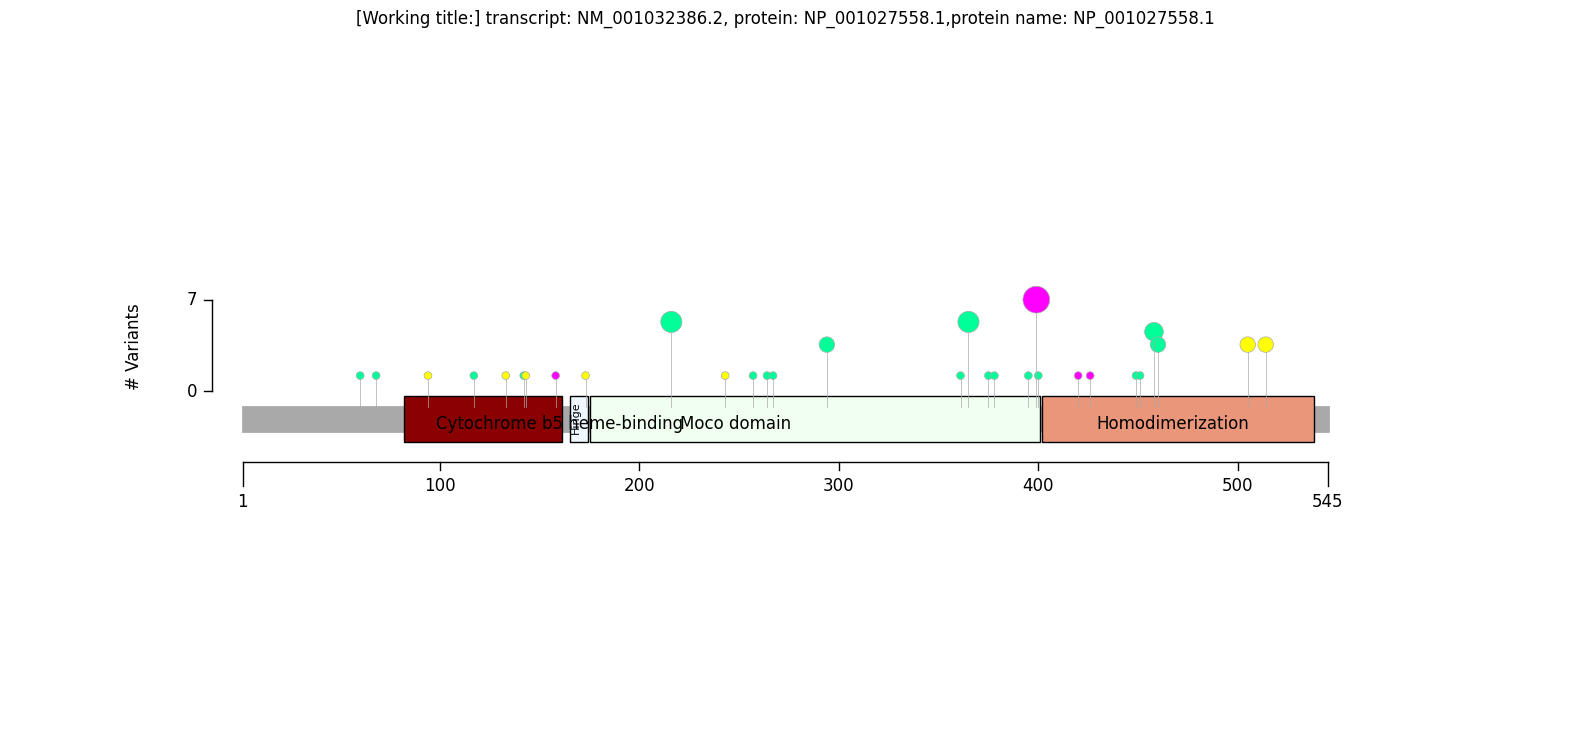

In [25]:
protein_meta = protein_metas[0]
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Genotype Phenotype Correlation Analysis analysis

In [15]:

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

## Run the analyses

Compare missense variants vs. other variants.

In [16]:
missense = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, SUOX_transcript_id)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_001032386.2                    Yes             No  \
                                                    Count Percent  Count   
Seizure [HP:0001250]                                17/24     71%  11/11   
Cognitive regression [HP:0034332]                    6/17     35%    0/8   
Hypotonia [HP:0001252]                              12/16     75%    3/7   
Abnormality of extrapyramidal motor function [H...   9/17     53%    2/8   
Abnormality of urinary uric acid level [HP:0012...    1/6     17%    1/1   
...                                                   ...     ...    ...   
Abnormal circulating cysteine concentration [HP...    3/3    100%    4/4   
Decreased head circumference [HP:0040195]             6/6    100%    4/4   
Abnormality of urine homeostasis [HP:0003110]       12/12    100%    2/2   
Abnormality of the genitourinary system [HP:000...  12/12    100%    2/2   
Abnormal circulating non-proteinogenic amino ac...    2/2    100%    0/0   

MISSENSE_VARIANT on NM_001032386.2                                    \
                                                   Percent   p value   
Seizure [HP:0001250]                                  100%  0.072129   
Cognitive regression [HP:0034332]                       0%  0.129170   
Hypotonia [HP:0001252]                                 43%  0.181896   
Abnormality of extrapyramidal motor function [H...     25%  0.233684   
Abnormality of urinary uric acid level [HP:0012...    100%  0.285714   
...                                                    ...       ...   
Abnormal circulating cysteine concentration [HP...    100%  1.000000   
Decreased head circumference [HP:0040195]             100%  1.000000   
Abnormality of urine homeostasis [HP:0003110]         100%  1.000000   
Abnormality of the genitourinary system [HP:000...    100%  1.000000   
Abnormal circulating non-proteinogenic amino ac...      0%  1.000000   

MISSENSE_VARIANT on NM_001032386.2                                    
                                                   Corrected p value  
Seizure [HP:0001250]                                             1.0  
Cognitive regression [HP:0034332]                                1.0  
Hypotonia [HP:0001252]                                           1.0  
Abnormality of extrapyramidal motor function [H...               1.0  
Abnormality of urinary uric acid level [HP:0012...               1.0  
...                                                              ...  
Abnormal circulating cysteine concentration [HP...               1.0  
Decreased head circumference [HP:0040195]                        1.0  
Abnormality of urine homeostasis [HP:0003110]                    1.0  
Abnormality of the genitourinary system [HP:000...               1.0  
Abnormal circulating non-proteinogenic amino ac...               1.0  

[71 rows x 6 columns]

Test for presence of genotype-phenotype correlations between subjects with >=1 allele of a variant vs. the others.

In [12]:
by_variant = analysis.compare_by_variant_key('12_56004589_56004589_C_G')
by_variant.summarize(hpo, PatientCategories.YES)

>=1 allele of the variant 12_56004589_56004589_C_G   Yes             No  \
                                                   Count Percent  Count   
Hypotonia [HP:0001252]                               1/5     20%  14/18   
Neurodevelopmental delay [HP:0012758]                0/6      0%   8/19   
Abnormality of extrapyramidal motor function [H...   1/6     17%  10/19   
Cognitive regression [HP:0034332]                    0/6      0%   6/19   
Ectopia lentis [HP:0001083]                          2/3     67%   5/15   
...                                                  ...     ...    ...   
Xanthinuria [HP:0010934]                             0/1      0%   2/10   
Abnormality of head or neck [HP:0000152]             2/2    100%    8/8   
Abnormal muscle physiology [HP:0011804]              2/2    100%  17/17   
Abnormality of the urinary system [HP:0000079]       2/2    100%  12/12   
Abnormal circulating nitrogen compound concentr...   1/1    100%    6/6   

>=1 allele of the variant 12_56004589_56004589_C_G                    \
                                                   Percent   p value   
Hypotonia [HP:0001252]                                 78%  0.032869   
Neurodevelopmental delay [HP:0012758]                  42%  0.129170   
Abnormality of extrapyramidal motor function [H...     53%  0.180435   
Cognitive regression [HP:0034332]                      32%  0.277764   
Ectopia lentis [HP:0001083]                            33%  0.528186   
...                                                    ...       ...   
Xanthinuria [HP:0010934]                               20%  1.000000   
Abnormality of head or neck [HP:0000152]              100%  1.000000   
Abnormal muscle physiology [HP:0011804]               100%  1.000000   
Abnormality of the urinary system [HP:0000079]        100%  1.000000   
Abnormal circulating nitrogen compound concentr...    100%  1.000000   

>=1 allele of the variant 12_56004589_56004589_C_G                    
                                                   Corrected p value  
Hypotonia [HP:0001252]                                           1.0  
Neurodevelopmental delay [HP:0012758]                            1.0  
Abnormality of extrapyramidal motor function [H...               1.0  
Cognitive regression [HP:0034332]                                1.0  
Ectopia lentis [HP:0001083]                                      1.0  
...                                                              ...  
Xanthinuria [HP:0010934]                                         1.0  
Abnormality of head or neck [HP:0000152]                         1.0  
Abnormal muscle physiology [HP:0011804]                          1.0  
Abnormality of the urinary system [HP:0000079]                   1.0  
Abnormal circulating nitrogen compound concentr...               1.0  

[68 rows x 6 columns]

TODO - finalize!